# 🚴‍♀️ Bike Sales – Exploratory Data Analysis (EDA) (ETL Step 1)

This notebook performs the **first step of the ETL pipeline** for the Bike Sales dataset from Kaggle.  
The goal is to explore the raw data, identify missing or inconsistent values, understand table relationships, and prepare the dataset for transformation and loading into a data warehouse.

Steps:
1. Load all CSV files into DataFrames  
2. Identify data types and missing values  
3. Generate descriptive statistics  
4. Create initial visualizations  
5. Analyze table relationships for ERD modeling

Technologies: Python, Pandas, Matplotlib, Seaborn, Missingno

### **Step 1 :** Import necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Display plots inside the notebook
%matplotlib inline

# Set visual style
sns.set(style="whitegrid")

### **Step 2:** Load all the CSV files

In [3]:
# Load datasets with encoding fallback
addresses = pd.read_csv("data/Addresses.csv", encoding="ISO-8859-1")
business_partners = pd.read_csv("data/BusinessPartners.csv", encoding="ISO-8859-1")
employees = pd.read_csv("data/Employees.csv", encoding="ISO-8859-1")
product_categories = pd.read_csv("data/ProductCategories.csv", encoding="ISO-8859-1")
products = pd.read_csv("data/Products.csv", encoding="ISO-8859-1")
product_texts = pd.read_csv("data/ProductTexts.csv", encoding="ISO-8859-1")
sales_order_items = pd.read_csv("data/SalesOrderItems.csv", encoding="ISO-8859-1")
sales_orders = pd.read_csv("data/SalesOrders.csv", encoding="ISO-8859-1")

### **Step 3:** Review the tables and begin explorations.

**Step 3.1:** Let’s start with the *addresses* table.

In [4]:
# Check how large the addresses table is
addresses.shape

(54, 12)

In [5]:
# Check column types and non-null counts
addresses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ï»¿ADDRESSID        54 non-null     int64  
 1   CITY                54 non-null     object 
 2   POSTALCODE          54 non-null     object 
 3   STREET              54 non-null     object 
 4   BUILDING            48 non-null     float64
 5   COUNTRY             54 non-null     object 
 6   REGION              54 non-null     object 
 7   ADDRESSTYPE         54 non-null     int64  
 8   VALIDITY_STARTDATE  54 non-null     int64  
 9   VALIDITY_ENDDATE    54 non-null     int64  
 10  LATITUDE            54 non-null     float64
 11  LONGITUDE           54 non-null     float64
dtypes: float64(3), int64(4), object(5)
memory usage: 5.2+ KB


<Axes: >

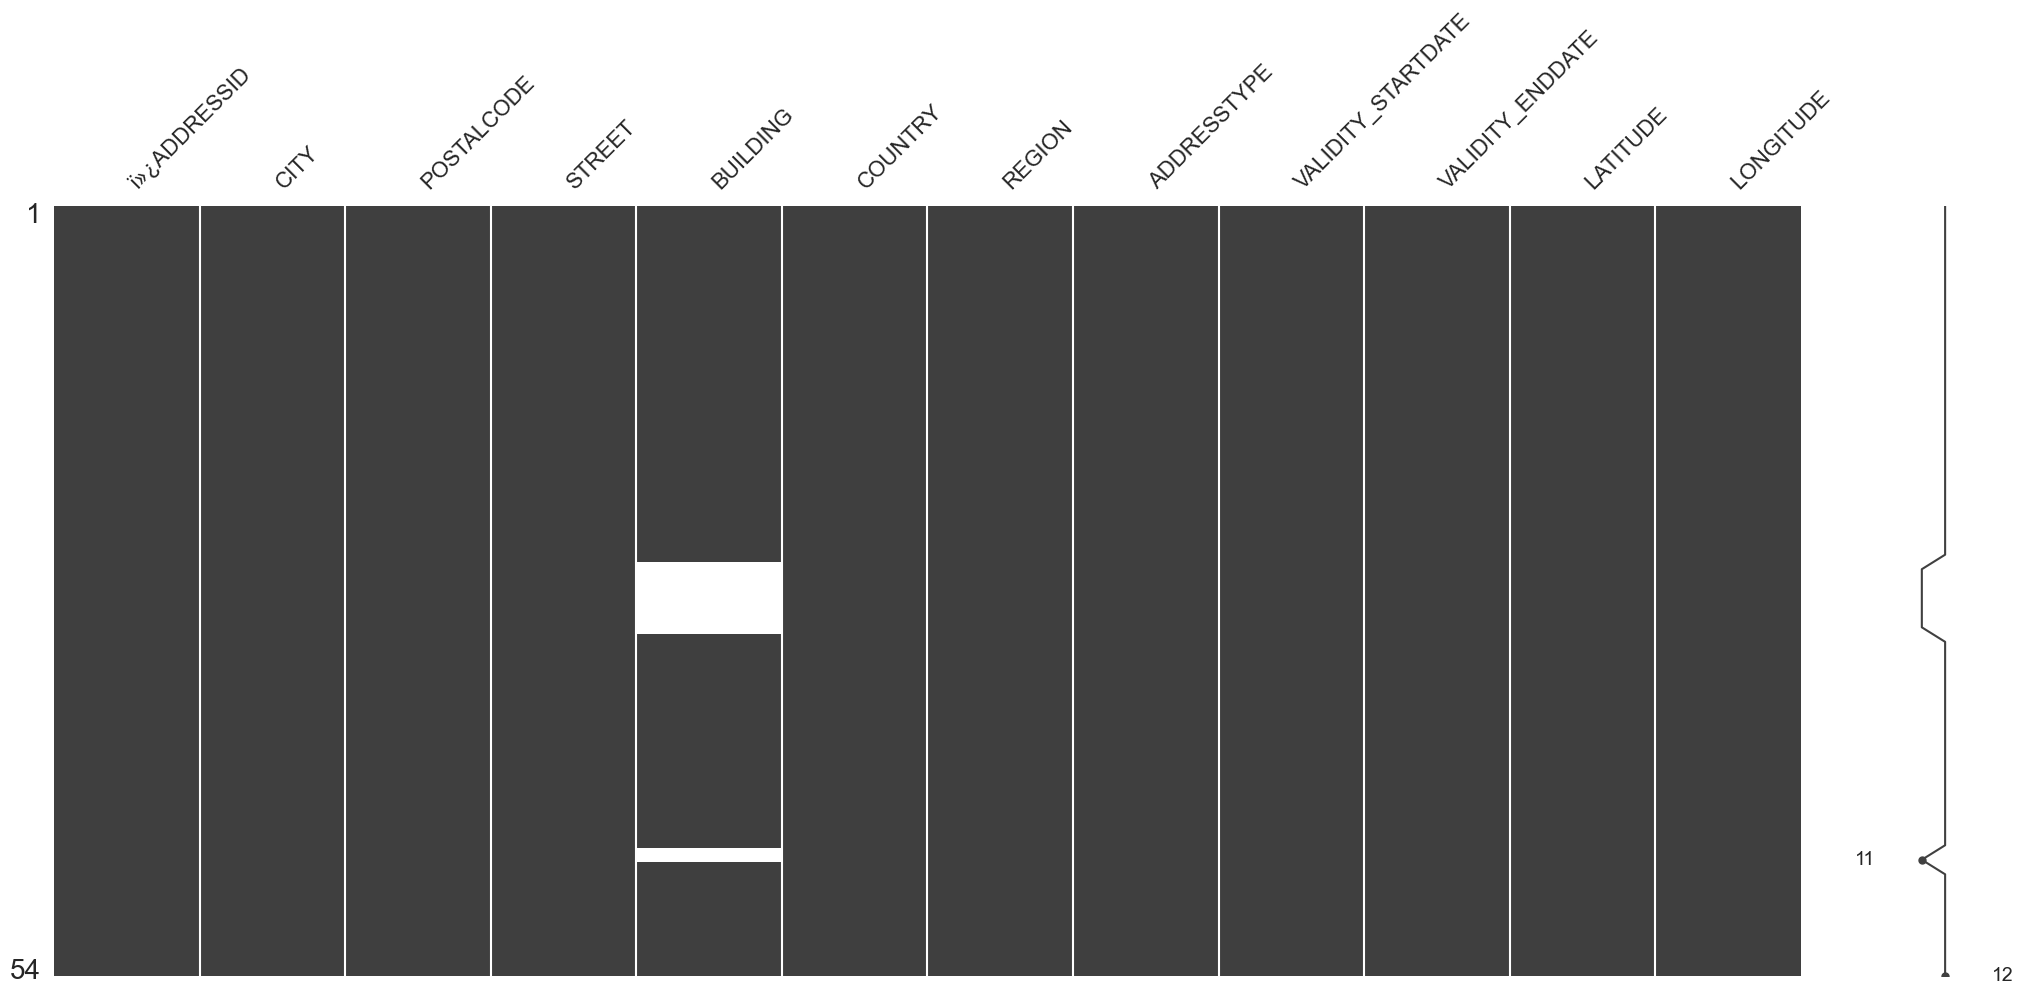

In [6]:
# To visualize missing data
msno.matrix(addresses)

In [7]:
# Preview of the addresses table
addresses.head()

,ï»¿ADDRESSID,CITY,POSTALCODE,STREET,BUILDING,COUNTRY,REGION,ADDRESSTYPE,VALIDITY_STARTDATE,VALIDITY_ENDDATE,LATITUDE,LONGITUDE
0,1000000034,West Nyack,10994,Settlers Lane,5027.0,US,AMER,2,20000101,99991231,41.100057,-73.973562
1,1000000035,Fair Oaks,95628,Woodland Terrace,4467.0,US,AMER,2,20000101,99991231,38.638355,-121.286683
2,1000000036,Dunn,28334,Layman Avenue,2250.0,US,AMER,2,20000101,99991231,35.312013,-78.609950
3,1000000037,Chicago,60605,University Drive,4697.0,US,AMER,2,20000101,99991231,41.874591,-87.627303
4,1000000038,Ocala,34471,Bagwell Avenue,1565.0,US,AMER,2,20000101,99991231,29.183977,-82.118413


In [22]:
addresses["VALIDITY_STARTDATE"].value_counts()

VALIDITY_STARTDATE
20000101    54
Name: count, dtype: int64

In [23]:
addresses["VALIDITY_ENDDATE"].value_counts()

VALIDITY_ENDDATE
99991231    54
Name: count, dtype: int64

**Country Distribution in `addresses`**

Let's examine the *Country* column to see if all entries are from the US or if other countries appear.

In [8]:
# Check unique countries in the addresses table
addresses["COUNTRY"].value_counts()

COUNTRY
US    9
CA    9
GB    6
DE    6
AU    6
IN    6
DU    6
FR    6
Name: count, dtype: int64

The abbreviations here are ISO country codes. Their expansions are as follows:
US → United States
CA → Canada
GB → Great Britain / United Kingdom
DE → Germany
AU → Australia
IN → India
FR → France

**Note:** However, DU is not an official ISO country code. It is likely a data error or an incorrect entry. Sometimes DU is used to refer to “Dubai” (which is actually a city in the UAE, not a country) or it may have been mistakenly entered instead of NL (Netherlands).

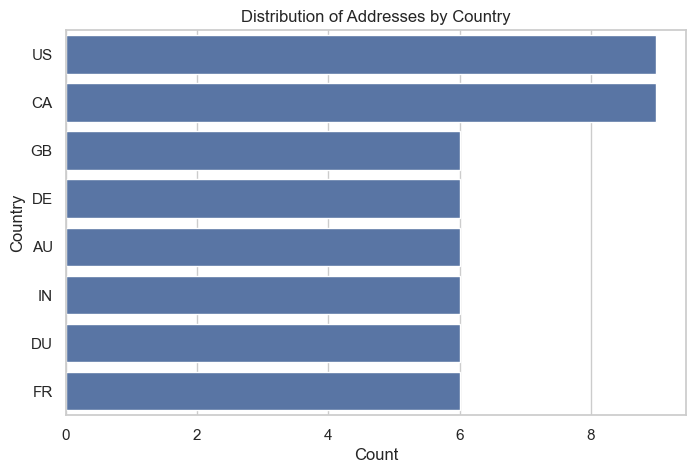

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(data=addresses, y="COUNTRY", order=addresses["COUNTRY"].value_counts().index)
plt.title("Distribution of Addresses by Country")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()

**Step 3.2:** Let’s examine with the *business_partners* table.

In [10]:
# Check how large the business_partners table is
business_partners.shape

(40, 14)

In [11]:
# Check column types and non-null counts
business_partners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PARTNERID     40 non-null     int64  
 1   PARTNERROLE   40 non-null     int64  
 2   EMAILADDRESS  40 non-null     object 
 3   PHONENUMBER   40 non-null     int64  
 4   FAXNUMBER     0 non-null      float64
 5   WEBADDRESS    40 non-null     object 
 6   ADDRESSID     40 non-null     int64  
 7   COMPANYNAME   40 non-null     object 
 8   LEGALFORM     40 non-null     object 
 9   CREATEDBY     40 non-null     int64  
 10  CREATEDAT     40 non-null     int64  
 11  CHANGEDBY     40 non-null     int64  
 12  CHANGEDAT     40 non-null     int64  
 13  CURRENCY      40 non-null     object 
dtypes: float64(1), int64(8), object(5)
memory usage: 4.5+ KB


<Axes: >

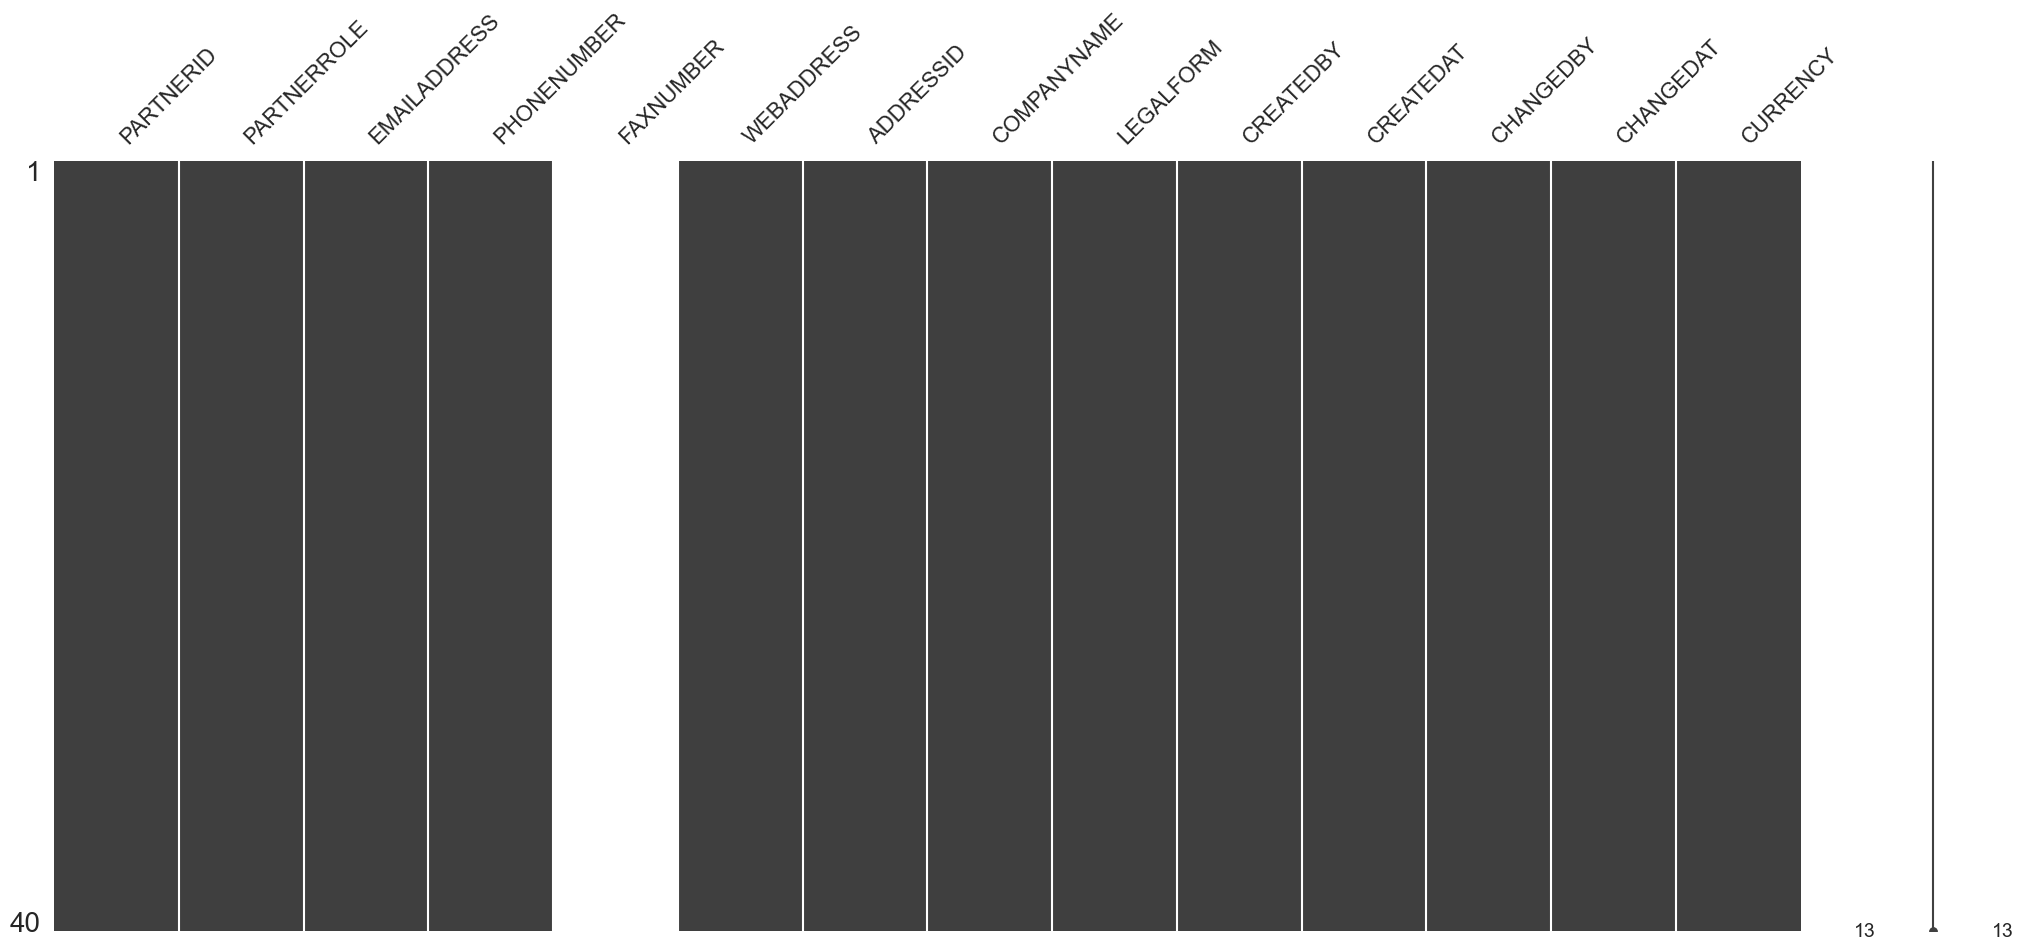

In [12]:
# To visualize missing data
msno.matrix(business_partners)

In [13]:
# Preview of the business_partners table
business_partners.head()

,PARTNERID,PARTNERROLE,EMAILADDRESS,PHONENUMBER,FAXNUMBER,WEBADDRESS,ADDRESSID,COMPANYNAME,LEGALFORM,CREATEDBY,CREATEDAT,CHANGEDBY,CHANGEDAT,CURRENCY
0,100000000,2,maria.brown@all4bikes.com,622734567,NaN,http://www.all4bikes.com,1000000034,All For Bikes,Inc.,10,20181003,10,20181003,USD
1,100000001,2,bob.buyer@amazebikes.com,3088530,NaN,http://www.amazebikes.com,1000000035,Amaze Bikes Inc,Inc.,13,20181003,13,20181003,USD
2,100000002,2,victor.sanchez@arenasportusa.com,3023352668,NaN,http://www.arenasportusa.com,1000000036,Arena Sports Inc,Inc.,14,20181003,14,20181003,USD
3,100000003,2,franklin.jones@atlantausa.com,511403266,NaN,http://www.atlantausa.com,1000000037,Atlanta Corp Inc,Inc.,10,20181003,10,20181003,USD
4,100000004,2,robert_brown@bikeworlds.com,2244668800,NaN,http://www.bikeworlds.com,1000000038,Bike World Inc,Inc.,4,20181003,4,20181003,USD


**Unique Companies in `business_partners`**

Count distinct companies to assess partner diversity.

In [14]:
# Count unique companies
business_partners["COMPANYNAME"].nunique()

40

In [15]:
business_partners["COMPANYNAME"].unique()

array(['All For Bikes', 'Amaze Bikes Inc', 'Arena Sports Inc',
       'Atlanta Corp Inc', 'Bike World Inc', 'Alpha AG',
       'BuchungsKreis 1010', 'Trek Cycle AG', 'Tona Bikes AG',
       'Meine Bicycle', 'Avante Grande Bikes', 'Bike On',
       'Carefree Cycles', 'G&M Bicycle', 'Keep Cycling',
       'iCare Australia', 'CC SportWorld', 'DigiPay',
       'TechCycle Canberra', 'eBike 100', 'Cycle World',
       'High Tech Sports Inc', 'Tires On Fire', 'MX Bike', 'FitnessWorld',
       'Homerun Millwork Inc.', 'Antonio Bandolera', 'Khan Cycles',
       'Palm Beach Bike World', 'A to Z Fitness', 'Hudson SportsTec',
       'Ebike 36', 'Wichita Sport', 'Move by Bike', 'TechCycle',
       'YourCycleShop', 'Unolab Manufacturing', 'E bike 201',
       'The Cycle Factor', 'Eiffel Bikes'], dtype=object)

**Step 3.3:** Let’s examine with the *employees* table.

In [16]:
# Check how large the employees table is
employees.shape

(14, 19)

In [17]:
# Check column types and non-null counts
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EMPLOYEEID          14 non-null     int64  
 1   NAME_FIRST          14 non-null     object 
 2   NAME_MIDDLE         12 non-null     object 
 3   NAME_LAST           14 non-null     object 
 4   NAME_INITIALS       0 non-null      float64
 5   SEX                 14 non-null     object 
 6   LANGUAGE            14 non-null     object 
 7   PHONENUMBER         14 non-null     object 
 8   EMAILADDRESS        14 non-null     object 
 9   LOGINNAME           14 non-null     object 
 10  ADDRESSID           14 non-null     int64  
 11  VALIDITY_STARTDATE  14 non-null     int64  
 12  VALIDITY_ENDDATE    14 non-null     int64  
 13  Unnamed: 13         0 non-null      float64
 14  Unnamed: 14         0 non-null      float64
 15  Unnamed: 15         0 non-null      float64
 16  Unnamed: 1

<Axes: >

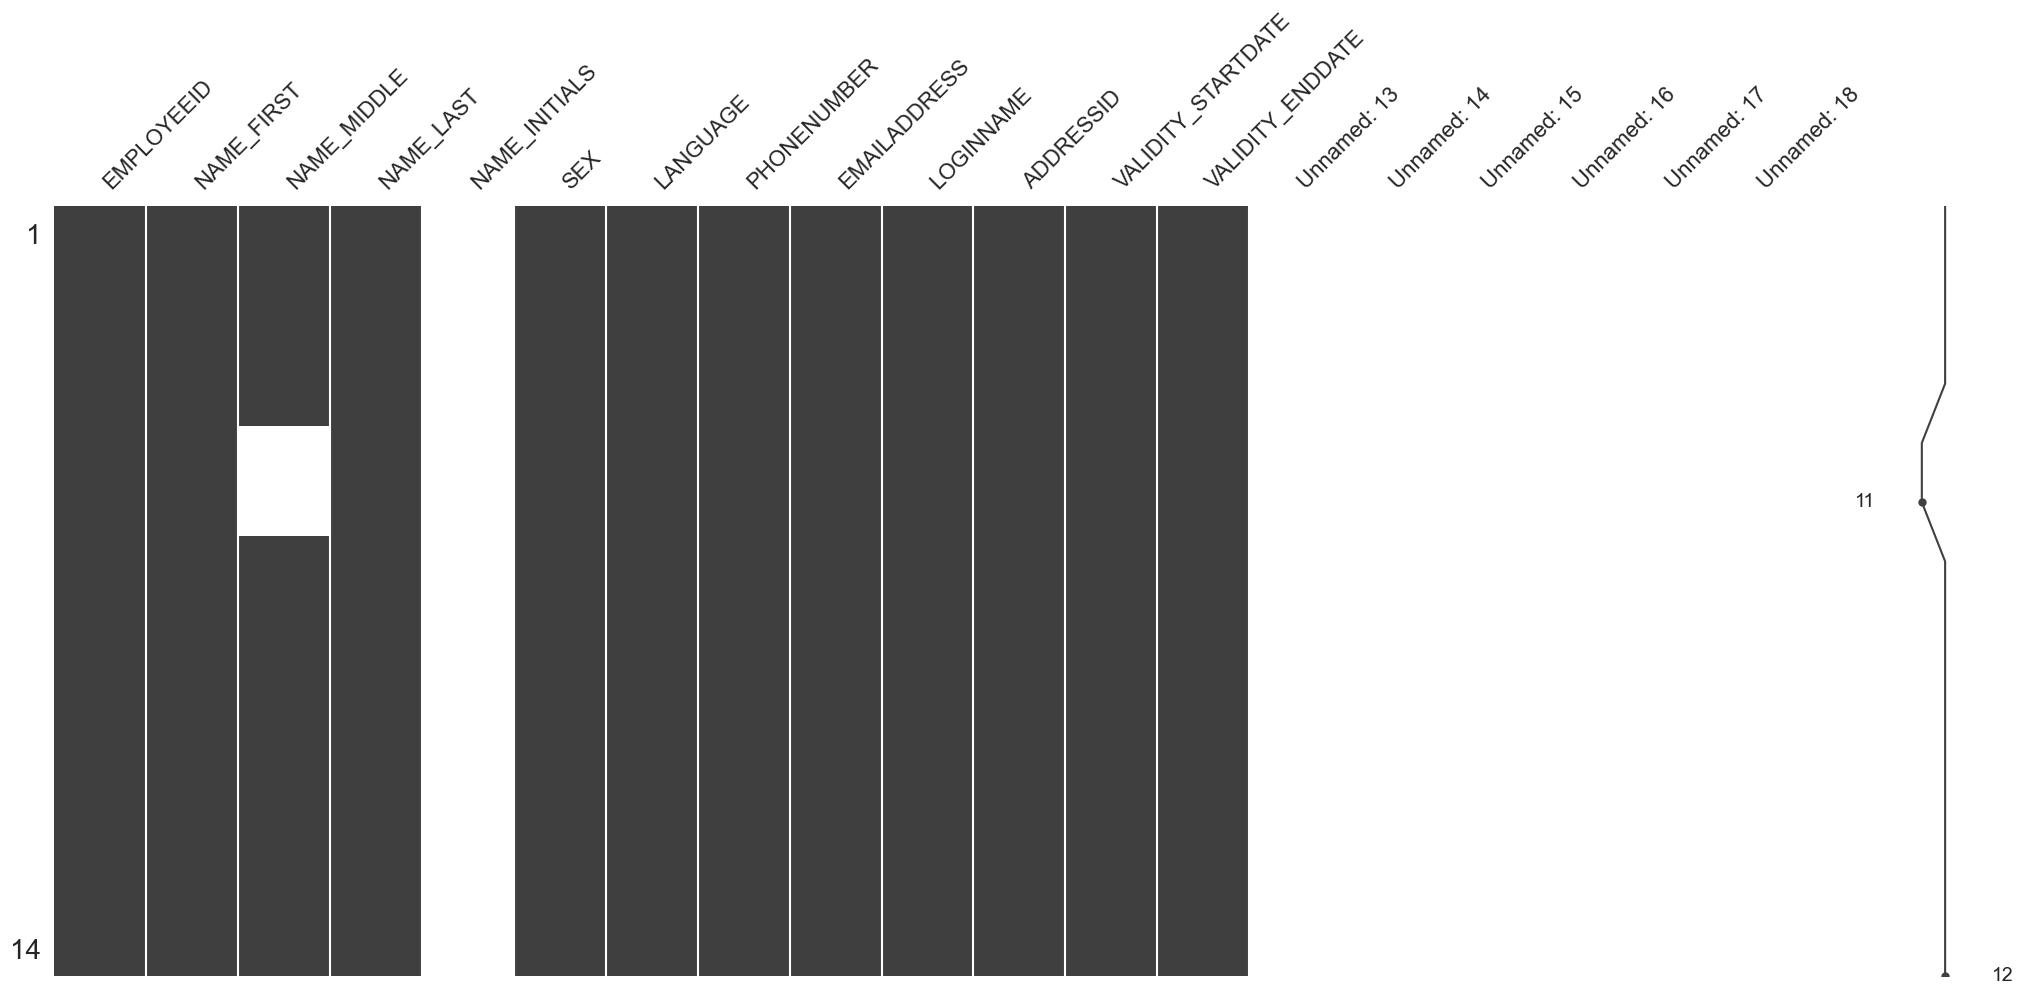

In [18]:
# To visualize missing data
msno.matrix(employees)

In [19]:
# Preview of the addresses table
employees.head()

,EMPLOYEEID,NAME_FIRST,NAME_MIDDLE,NAME_LAST,NAME_INITIALS,SEX,LANGUAGE,PHONENUMBER,EMAILADDRESS,LOGINNAME,ADDRESSID,VALIDITY_STARTDATE,VALIDITY_ENDDATE,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,1,Derrick,L,Magill,NaN,M,E,630-374-0306,derrick.magill@itelo.info,derrickm,1000000001,20000101,99991231,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Philipp,T,Egger,NaN,M,E,09603 61 24 64,philipp.egger@itelo.info,philippm,1000000002,20000101,99991231,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Ellis,K,Robertson,NaN,M,E,070 8691 2288,ellis.robertson@itelo.info,ellism,1000000003,20000101,99991231,NaN,NaN,NaN,NaN,NaN,NaN
3,4,William,M,Mussen,NaN,M,E,026734 4556,william.mussen@itelo.info,williamm,1000000004,20000101,99991231,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Javas,NaN,Hegde,NaN,M,E,02224135120,javas.hegde@itelo.info,javasm,1000000005,20000101,99991231,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
employees["VALIDITY_STARTDATE"].value_counts()

VALIDITY_STARTDATE
20000101    14
Name: count, dtype: int64

In [21]:
employees["VALIDITY_ENDDATE"].value_counts()

VALIDITY_ENDDATE
99991231    14
Name: count, dtype: int64

**Gender Distribution in `employees`**

Count males and females from the `SEX` column.

In [68]:
employees["SEX"].value_counts()

SEX
M    10
F     4
Name: count, dtype: int64

**Missing Values in `NAME_INITIALS`**

Check if all entries in `NAME_INITIALS` are NaN.

In [69]:
employees["NAME_INITIALS"].isna().all()

np.True_

**Language in `employees`**

Check if all `LANGUAGE` entries are "E".

In [70]:
(employees["LANGUAGE"] == "E").all()

np.True_

**Missing Values in Last 6 `Unnamed` Columns**

Check if the last six columns without headers are empty.

In [71]:
# Identify columns whose names start with 'Unnamed'
unnamed_cols = [col for col in employees.columns if col.startswith("Unnamed")]

# Check if all values in each of these columns are NaN
employees[unnamed_cols].isna().all()

Unnamed: 13    True
Unnamed: 14    True
Unnamed: 15    True
Unnamed: 16    True
Unnamed: 17    True
Unnamed: 18    True
dtype: bool

**Note:** Based on the inspection results, there are 7 columns in this table that contain only missing (NaN) values. These columns should be considered for removal or proper handling during the data cleaning phase to improve data quality and reduce unnecessary storage.

**Step 3.4:** Let’s examine with the *product_categories* table.

In [72]:
# Check how large the product_categories table is
product_categories.shape

(9, 3)

In [44]:
# Check column types and non-null counts
product_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   PRODCATEGORYID  9 non-null      object
 1   CREATEDBY       9 non-null      int64 
 2   CREATEDAT       9 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 348.0+ bytes


In [30]:
# Preview of the product_categories table
product_categories.head()

,PRODCATEGORYID,CREATEDBY,CREATEDAT
0,RO,12,20181003
1,BX,4,20181003
2,CC,7,20181003
3,MB,11,20181003
4,RC,9,20181003


**Step 3.5:** Let’s examine with the *products* table.

In [31]:
# Check how large the products table is
products.shape

(42, 19)

In [45]:
# Check column types and non-null counts
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PRODUCTID           42 non-null     object 
 1   TYPECODE            42 non-null     object 
 2   PRODCATEGORYID      42 non-null     object 
 3   CREATEDBY           42 non-null     int64  
 4   CREATEDAT           42 non-null     int64  
 5   CHANGEDBY           42 non-null     int64  
 6   CHANGEDAT           42 non-null     int64  
 7   SUPPLIER_PARTNERID  42 non-null     int64  
 8   TAXTARIFFCODE       42 non-null     int64  
 9   QUANTITYUNIT        42 non-null     object 
 10  WEIGHTMEASURE       42 non-null     float64
 11  WEIGHTUNIT          42 non-null     object 
 12  CURRENCY            42 non-null     object 
 13  PRICE               42 non-null     int64  
 14  WIDTH               0 non-null      float64
 15  DEPTH               0 non-null      float64
 16  HEIGHT    

In [25]:
# Preview of the products table
products.head()

,PRODUCTID,TYPECODE,PRODCATEGORYID,CREATEDBY,CREATEDAT,CHANGEDBY,CHANGEDAT,SUPPLIER_PARTNERID,TAXTARIFFCODE,QUANTITYUNIT,WEIGHTMEASURE,WEIGHTUNIT,CURRENCY,PRICE,WIDTH,DEPTH,HEIGHT,DIMENSIONUNIT,PRODUCTPICURL
0,RO-1001,PR,RO,9,20181003,9,20181003,100000000,1,EA,7.7,KG,USD,525,NaN,NaN,NaN,NaN,NaN
1,RO-1002,PR,RO,9,20181003,9,20181003,100000001,1,EA,8.0,KG,USD,689,NaN,NaN,NaN,NaN,NaN
2,RO-1003,PR,RO,12,20181003,12,20181003,100000002,1,EA,9.1,KG,USD,721,NaN,NaN,NaN,NaN,NaN
3,BX-1011,PR,BX,9,20181003,9,20181003,100000003,1,EA,11.1,KG,USD,249,NaN,NaN,NaN,NaN,NaN
4,BX-1012,PR,BX,6,20181003,6,20181003,100000004,1,EA,12.0,KG,USD,399,NaN,NaN,NaN,NaN,NaN


In [24]:
products["WEIGHTUNIT"].value_counts()

WEIGHTUNIT
KG    42
Name: count, dtype: int64

In [25]:
products["CURRENCY"].value_counts()

CURRENCY
USD    42
Name: count, dtype: int64

In [26]:
products["QUANTITYUNIT"].value_counts()

QUANTITYUNIT
EA    42
Name: count, dtype: int64

**Note:** The `products` and `product_categories` tables are linked via `PRODUCTCATEGORYID`. Each product belongs to a category. This relationship can be visualized later with an ER diagram to support joins and reporting.

**Missing Values in `WIDTH` `DEPTH` `HEIGHT` `DIMENSIONUNIT` `PRODUCTPICURL`**

Check if all entries in `WIDTH` `DEPTH` `HEIGHT` `DIMENSIONUNIT` `PRODUCTPICURL` are NaN.

In [35]:
products["WIDTH"].isna().all()
products["DEPTH"].isna().all()
products["HEIGHT"].isna().all()
products["DIMENSIONUNIT"].isna().all()
products["PRODUCTPICURL"].isna().all()

np.True_

**Note:** 5 columns contain only missing values. Flag them for removal or handling to improve data quality.

**Step 3.6:** Let’s examine with the *product_texts* table.

In [37]:
# Check how large the product_texts table is
product_texts.shape

(44, 5)

In [46]:
# Check column types and non-null counts
product_texts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PRODUCTID     44 non-null     object 
 1   LANGUAGE      44 non-null     object 
 2   SHORT_DESCR   44 non-null     object 
 3   MEDIUM_DESCR  36 non-null     object 
 4   LONG_DESCR    0 non-null      float64
dtypes: float64(1), object(4)
memory usage: 1.8+ KB


<Axes: >

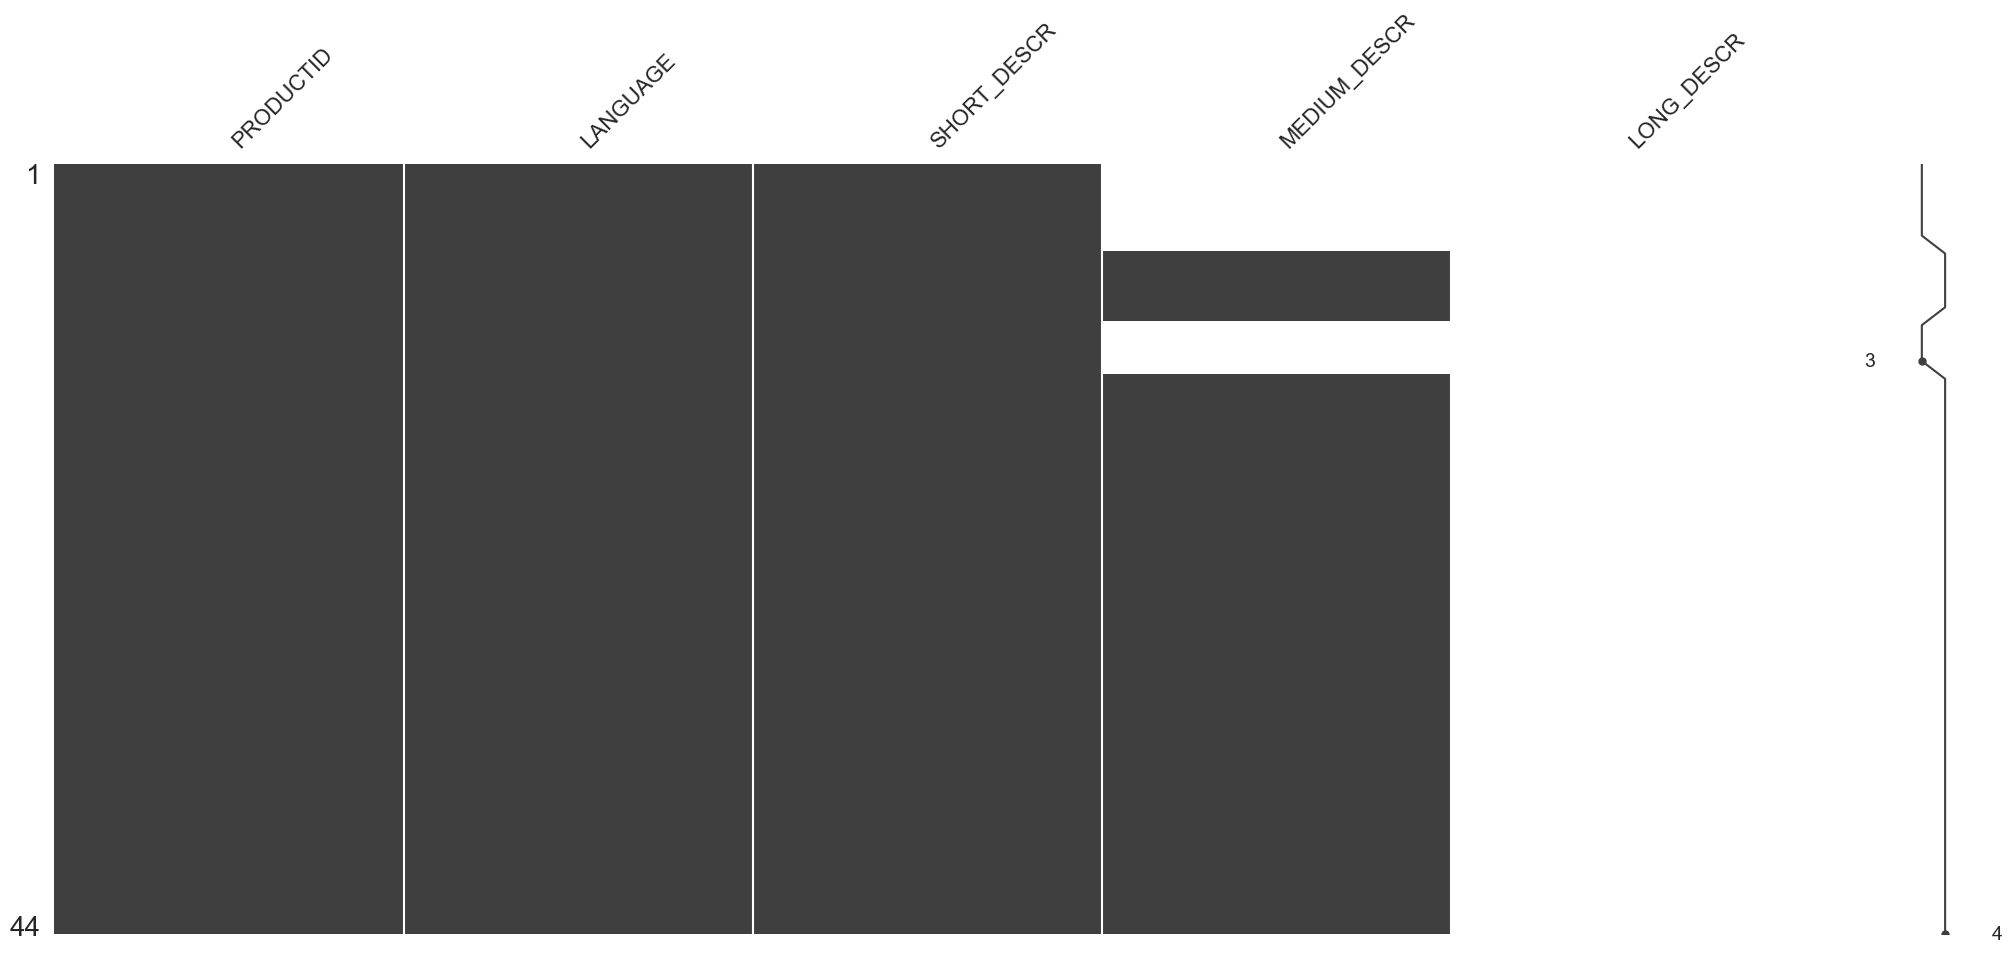

In [89]:
# To visualize missing data
msno.matrix(product_texts)

In [38]:
# Preview of the product_texts table
product_texts.head()

,PRODUCTID,LANGUAGE,SHORT_DESCR,MEDIUM_DESCR,LONG_DESCR
0,RO-1001,EN,Roady 1001,NaN,NaN
1,RO-1002,EN,Roady 1002,NaN,NaN
2,RO-1003,EN,Roady 1003,NaN,NaN
3,BX-1011,EN,BMX Vintage 1011,NaN,NaN
4,BX-1012,EN,BMX Jump 1012,NaN,NaN


**Validate Product IDs**

Compare `PRODUCTID` in `products` (42) vs. `product_texts` (44) to find mismatches.

In [46]:
product_texts["PRODUCTID"].nunique()

42

In [47]:
product_texts["PRODUCTID"].value_counts()

PRODUCTID
RC-1056    2
RC-1055    2
RO-1003    1
BX-1011    1
BX-1012    1
BX-1013    1
BX-1014    1
BX-1015    1
RO-1001    1
RO-1002    1
CC-1021    1
BX-1016    1
CC-1022    1
CC-1023    1
MB-1033    1
MB-1034    1
MB-1031    1
MB-1032    1
RC-1052    1
RC-1051    1
RC-1054    1
RC-1053    1
RC-1057    1
DB-1081    1
DB-1082    1
DB-1083    1
EB-1131    1
EB-1132    1
EB-1133    1
EB-1134    1
EB-1135    1
EB-1136    1
EB-1137    1
CB-1161    1
CB-1162    1
CB-1163    1
HB-1171    1
HB-1172    1
HB-1173    1
HB-1174    1
HB-1175    1
HB-1176    1
Name: count, dtype: int64

**Language Check for Selected Products**

Let's filter the `product_texts` table to examine which languages are used for the descriptions of products `RC-1055` and `RC-1056`.

In [52]:
# Filter the product_texts table for the selected products
filtered = product_texts[product_texts["PRODUCTID"].isin(["RC-1055", "RC-1056"])]

# Display the languages used for each product
filtered[["PRODUCTID", "LANGUAGE"]]

,PRODUCTID,LANGUAGE
20,RC-1055,EN
21,RC-1055,DE
22,RC-1056,EN
23,RC-1056,DE


**Note:** `RC-1055` and `RC-1056` have descriptions in two languages. Extra rows in `product_texts` are for multilingual support, not duplicates, and should be kept.

**Missing Values in `LONG_DESCR`**

Check if all entries in `LONG_DESCR` are NaN.

In [14]:
product_texts["LONG_DESCR"].isna().all()

np.True_

**Note:** 2 columns contain only missing values. Flag them for removal or handling to improve data quality.

**Step 3.7:** Let’s examine with the *sales_order_items* table.

In [54]:
# Check how large the sales_order_items table is
sales_order_items.shape

(1930, 13)

In [47]:
# Check column types and non-null counts
sales_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1930 entries, 0 to 1929
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SALESORDERID    1930 non-null   int64  
 1   SALESORDERITEM  1930 non-null   int64  
 2   PRODUCTID       1930 non-null   object 
 3   NOTEID          1930 non-null   object 
 4   CURRENCY        1930 non-null   object 
 5   GROSSAMOUNT     1930 non-null   int64  
 6   NETAMOUNT       1930 non-null   float64
 7   TAXAMOUNT       1930 non-null   float64
 8   ITEMATPSTATUS   1930 non-null   object 
 9   OPITEMPOS       0 non-null      float64
 10  QUANTITY        1930 non-null   int64  
 11  QUANTITYUNIT    1930 non-null   object 
 12  DELIVERYDATE    1930 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 196.1+ KB


In [57]:
# Preview of the sales_order_items table
sales_order_items.head()

,SALESORDERID,SALESORDERITEM,PRODUCTID,NOTEID,CURRENCY,GROSSAMOUNT,NETAMOUNT,TAXAMOUNT,ITEMATPSTATUS,OPITEMPOS,QUANTITY,QUANTITYUNIT,DELIVERYDATE
0,500000000,10,MB-1034,,USD,2499,2186.625,312.375,I,NaN,4,EA,20180311
1,500000000,20,CB-1161,,USD,399,349.125,49.875,I,NaN,9,EA,20180311
2,500000001,10,HB-1175,,USD,899,786.625,112.375,I,NaN,2,EA,20180228
3,500000001,20,RC-1056,,USD,2499,2186.625,312.375,I,NaN,2,EA,20180228
4,500000001,30,CC-1021,,USD,1144,1001.000,143.000,I,NaN,3,EA,20180228


**Quick check for date Values in `DELIVERYDATE`**

In [27]:
sales_order_items["DELIVERYDATE"].value_counts()

DELIVERYDATE
20190122    29
29991212    22
20180808    22
20190213    21
20190613    21
            ..
20180606     1
20180308     1
20180328     1
20180411     1
20190628     1
Name: count, Length: 239, dtype: int64

Note: The column `DELIVERYDATE` contained out-of-bounds values such as `29991212`, which exceed pandas' datetime limit (2262-04-11).

**Missing Values in `OPITEMPOS`**

Check if all entries in `OPITEMPOS`are NaN.

In [60]:
sales_order_items["OPITEMPOS"].isna().all()

np.True_

**Note:** `OPITEMPOS` seems to contain only missing values. `DELIVERYDATE` should be converted to datetime in ETL for time-based analysis.

In [82]:
# Unique values in categorical columns
print("Quantity unit types:", sales_order_items["QUANTITYUNIT"].unique())
print("Currency types:", sales_order_items["CURRENCY"].unique())

Quantity unit types: ['EA']
Currency types: ['USD']


**Step 3.8:** Let’s examine with the *sales_orders* table.

In [63]:
# Check how large the sales_orders table is
sales_orders.shape

(334, 17)

In [48]:
# Check column types and non-null counts
sales_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SALESORDERID      334 non-null    int64  
 1   CREATEDBY         334 non-null    int64  
 2   CREATEDAT         334 non-null    int64  
 3   CHANGEDBY         334 non-null    int64  
 4   CHANGEDAT         334 non-null    int64  
 5   FISCVARIANT       334 non-null    object 
 6   FISCALYEARPERIOD  334 non-null    int64  
 7   NOTEID            0 non-null      float64
 8   PARTNERID         334 non-null    int64  
 9   SALESORG          334 non-null    object 
 10  CURRENCY          334 non-null    object 
 11  GROSSAMOUNT       334 non-null    int64  
 12  NETAMOUNT         334 non-null    float64
 13  TAXAMOUNT         334 non-null    float64
 14  LIFECYCLESTATUS   334 non-null    object 
 15  BILLINGSTATUS     334 non-null    object 
 16  DELIVERYSTATUS    334 non-null    object 
dt

In [64]:
# Preview of the sales_orders table
sales_orders.head()

,SALESORDERID,CREATEDBY,CREATEDAT,CHANGEDBY,CHANGEDAT,FISCVARIANT,FISCALYEARPERIOD,NOTEID,PARTNERID,SALESORG,CURRENCY,GROSSAMOUNT,NETAMOUNT,TAXAMOUNT,LIFECYCLESTATUS,BILLINGSTATUS,DELIVERYSTATUS
0,500000000,4,20180111,4,20180116,K4,2018001,NaN,100000022,APJ,USD,13587,11888.625,1698.375,C,C,C
1,500000001,2,20180112,2,20180115,K4,2018001,NaN,100000026,EMEA,USD,12622,11044.250,1577.750,C,C,C
2,500000002,5,20180115,5,20180120,K4,2018001,NaN,100000018,APJ,USD,45655,39948.125,5706.875,C,C,C
3,500000003,3,20180115,3,20180120,K4,2018001,NaN,100000009,EMEA,USD,101786,89062.750,12723.250,C,C,C
4,500000004,8,20180116,8,20180117,K4,2018001,NaN,100000025,EMEA,USD,71684,62723.500,8960.500,C,C,C


In [28]:
sales_orders["FISCALYEARPERIOD"].value_counts()

FISCALYEARPERIOD
2018011    25
2018007    24
2018009    22
2018002    22
2018010    21
2018012    20
2018003    20
2018004    19
2019005    19
2019006    18
2019002    18
2019004    17
2019001    17
2018005    16
2018006    16
2018008    14
2018001    13
2019003    13
Name: count, dtype: int64

In [73]:
# Check missing values
sales_orders.isnull().sum()

SALESORDERID          0
CREATEDBY             0
CREATEDAT             0
CHANGEDBY             0
CHANGEDAT             0
FISCVARIANT           0
FISCALYEARPERIOD      0
NOTEID              334
PARTNERID             0
SALESORG              0
CURRENCY              0
GROSSAMOUNT           0
NETAMOUNT             0
TAXAMOUNT             0
LIFECYCLESTATUS       0
BILLINGSTATUS         0
DELIVERYSTATUS        0
dtype: int64

<Axes: >

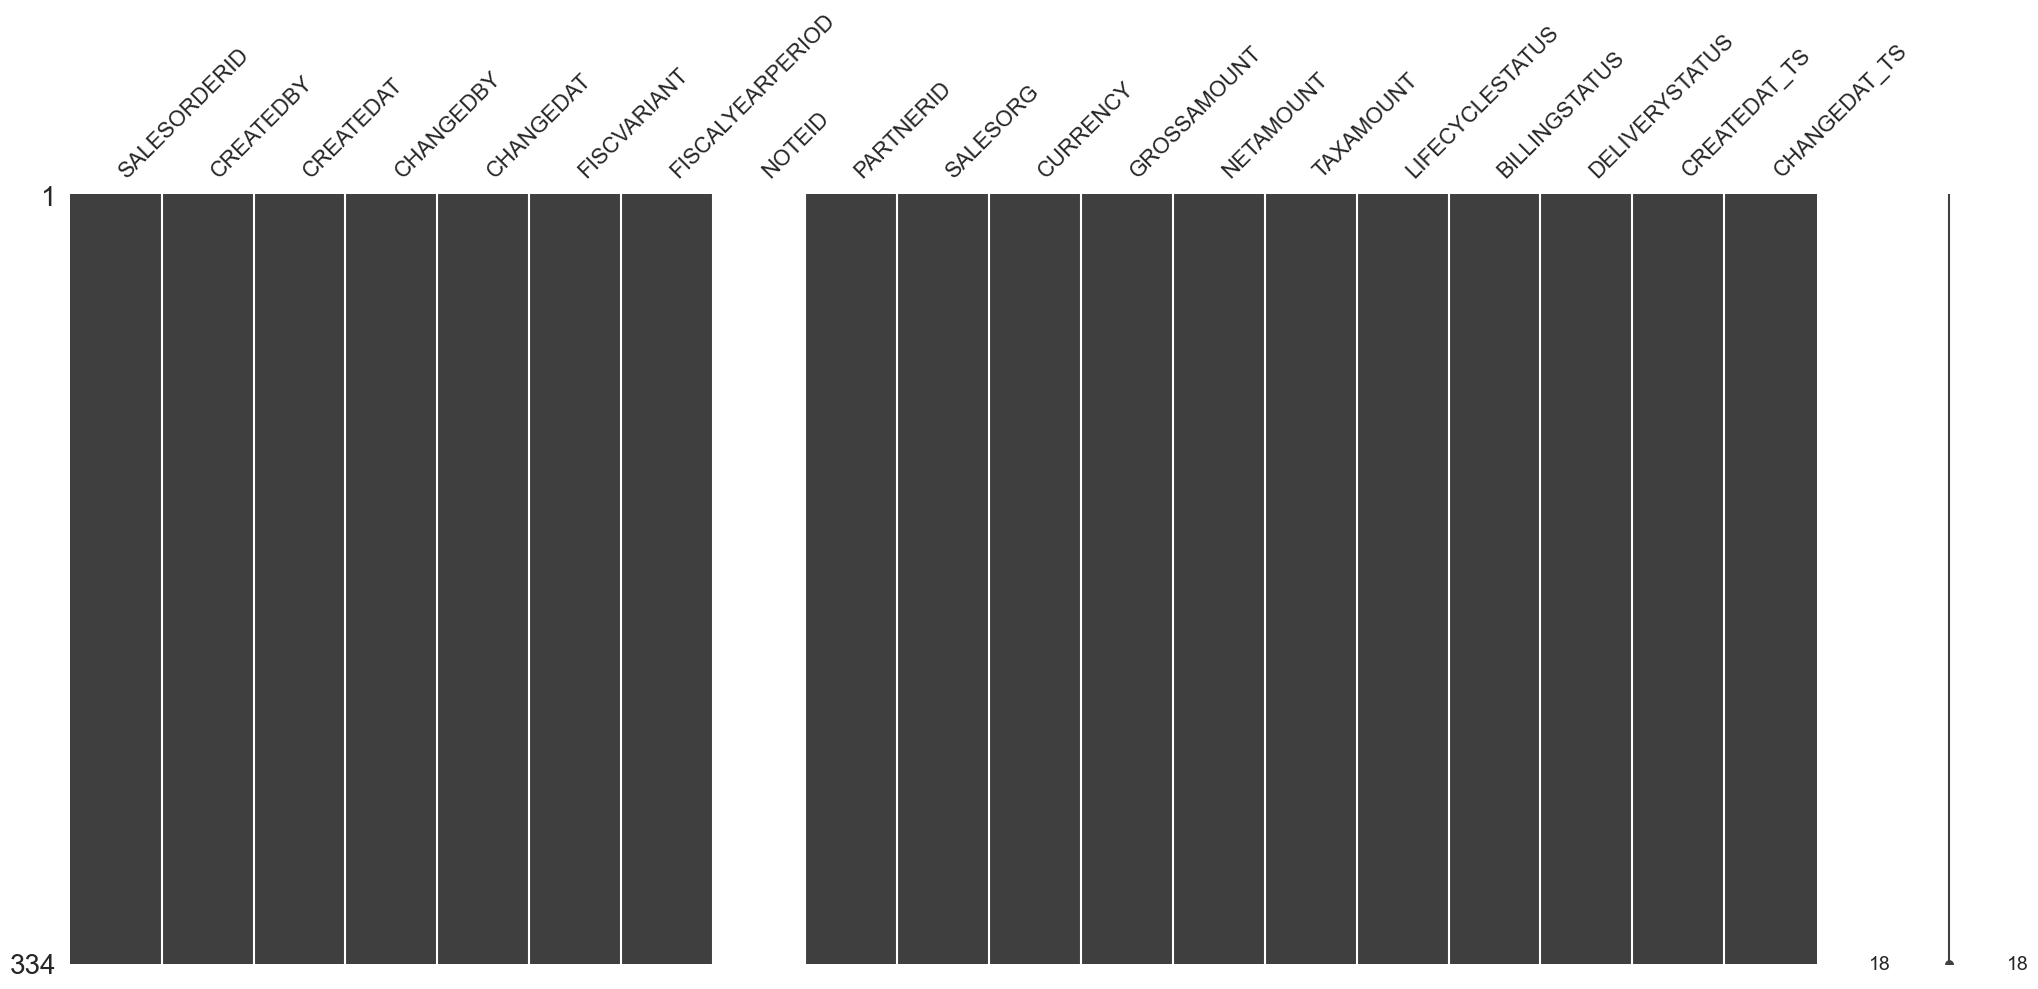

In [85]:
msno.matrix(sales_orders)

**Note:** 1 column contain only missing values. Flag them for removal or handling to improve data quality.

In [74]:
# Check unique values in each status column
print("Lifecycle Status:", sales_orders["LIFECYCLESTATUS"].unique())
print("Billing Status:", sales_orders["BILLINGSTATUS"].unique())
print("Delivery Status:", sales_orders["DELIVERYSTATUS"].unique())

Lifecycle Status: ['C' 'X' 'I']
Billing Status: ['C' 'X' 'I']
Delivery Status: ['C' 'X' 'I']


**Note:** `LIFECYCLESTATUS`, `BILLINGSTATUS`, and `DELIVERYSTATUS` use codes `'C'`, `'X'`, and `'I'` (Completed, Cancelled, In-Progress). Keep them in mind when filtering, aggregating, or reporting.

In [75]:
# Summary statistics for meaningful numeric columns
# Select for the meaningful numeric columns
columns_to_describe = ["GROSSAMOUNT", "NETAMOUNT", "TAXAMOUNT"]

# Apply describe only to selected columns
sales_orders[columns_to_describe].describe()

,GROSSAMOUNT,NETAMOUNT,TAXAMOUNT
count,334.000000,334.000000,334.000000
mean,61179.272455,53531.863398,7647.409057
std,41036.220808,35906.693207,5129.527601
min,379.000000,331.625000,47.375000
25%,29097.750000,25460.531250,3637.218750
50%,55599.000000,48649.125000,6949.875000
75%,85473.500000,74789.312500,10684.187500
max,193987.000000,169738.625000,24248.375000


In [81]:
# Unique values in categorical columns
print("Sales Organizations:", sales_orders["SALESORG"].unique())
print("Currency types:", sales_orders["CURRENCY"].unique())

Sales Organizations: ['APJ' 'EMEA' 'AMER']
Currency types: ['USD']


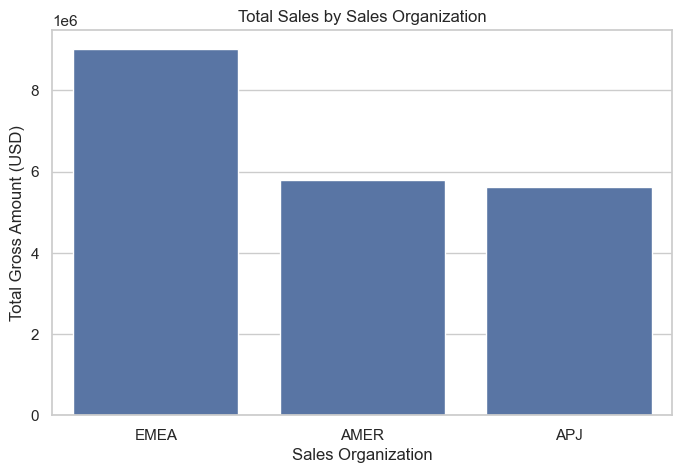

In [17]:
sales_by_org = sales_orders.groupby("SALESORG")["GROSSAMOUNT"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=sales_by_org.index, y=sales_by_org.values)
plt.title("Total Sales by Sales Organization")
plt.xlabel("Sales Organization")
plt.ylabel("Total Gross Amount (USD)")
plt.show()

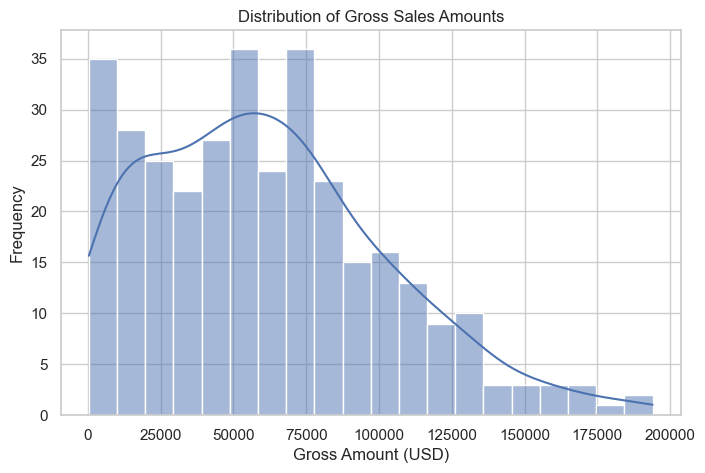

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(data=sales_orders, x="GROSSAMOUNT", bins=20, kde=True)
plt.title("Distribution of Gross Sales Amounts")
plt.xlabel("Gross Amount (USD)")
plt.ylabel("Frequency")
plt.show()

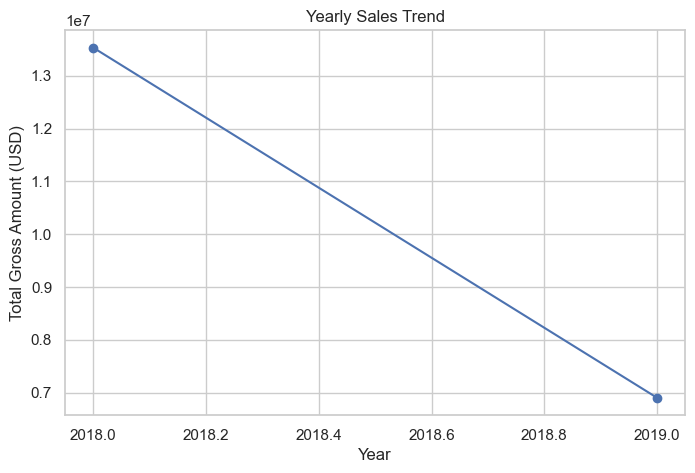

In [91]:
sales_orders["CREATEDAT"] = pd.to_datetime(sales_orders["CREATEDAT"], format="%Y%m%d")
sales_by_year = sales_orders.groupby(sales_orders["CREATEDAT"].dt.year)["GROSSAMOUNT"].sum()

plt.figure(figsize=(8,5))
sales_by_year.plot(kind="line", marker="o")
plt.title("Yearly Sales Trend")
plt.xlabel("Year")
plt.ylabel("Total Gross Amount (USD)")
plt.grid(True)
plt.show()

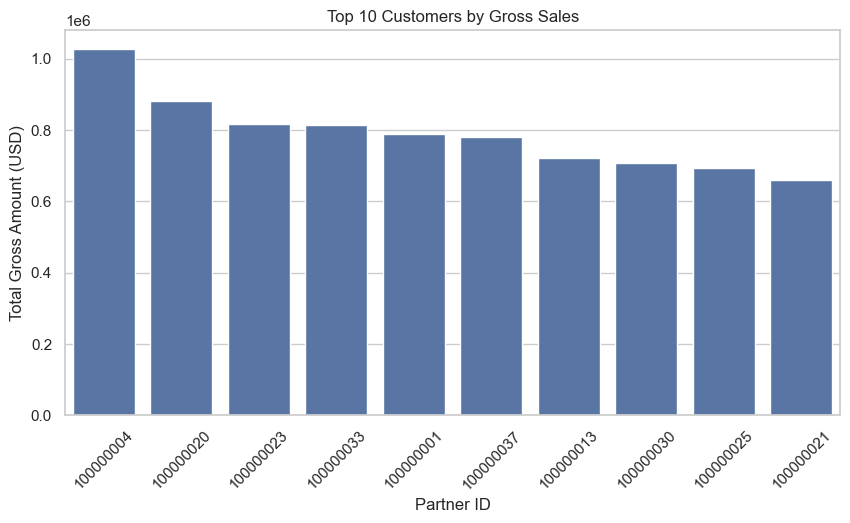

In [90]:
top_customers = sales_orders.groupby("PARTNERID")["GROSSAMOUNT"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values)
plt.title("Top 10 Customers by Gross Sales")
plt.xlabel("Partner ID")
plt.ylabel("Total Gross Amount (USD)")
plt.xticks(rotation=45)
plt.show()

### Entity Relationship Diagram (ERD)

The following diagram was created in Lucidchart based on the relationships identified during the EDA phase. It serves as the blueprint for the transformation and loading stages of the ETL pipeline.

![ERD Diagram](erd.png)

---

## ✅ Final Note: EDA Summary & Insights

After completing the exploratory analysis, the following insights were gathered:

- All tables were successfully loaded and inspected for missing values and data types.
- Several columns were identified for removal due to being entirely null.  
  Examples include:  
  - `business_partners`: `FAXNUMBER`  
  - `employees`: `NAME_INITIALS`, `Unnamed: 13–18`  
  - `products`: `WIDTH`, `DEPTH`, `HEIGHT`, `DIMENSIONUNIT`, `PRODUCTPICURL`  
  - `product_texts`: `LONG_DESCR`  
  - `sales_order_items`: `OPITEMPOS`  
  - `sales_orders`: `NOTEID`
- Date columns such as `CREATEDAT` and `CHANGEDAT` will be converted to proper datetime format in the next notebook (`02_transform_bike_sales.ipynb`).
- Table relationships were mapped based on shared keys such as `PRODUCTID`, `PARTNERID`, and `SALESORDERID`.
- A preliminary ERD was constructed to guide the transformation and loading stages of the ETL pipeline.

This notebook sets the foundation for the next phase: **data transformation and loading into SQL Server**.

---